<a href="https://colab.research.google.com/github/Shahidul2/ML-practices/blob/main/Boston_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House Price Prediction using XgBoost Algorithm**

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House Price Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
print(df)

        crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0    0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...  ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273     21.0  396.90   7.88  11.9

[506 rows x 14 columns]


In [ ]:
#Checking the number of rows and columns
df.shape

(506, 14)

In [ ]:
#Checking for missing values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
# Statistical measures of the data
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Checking correlation between the various features using Heatmap


<AxesSubplot:>

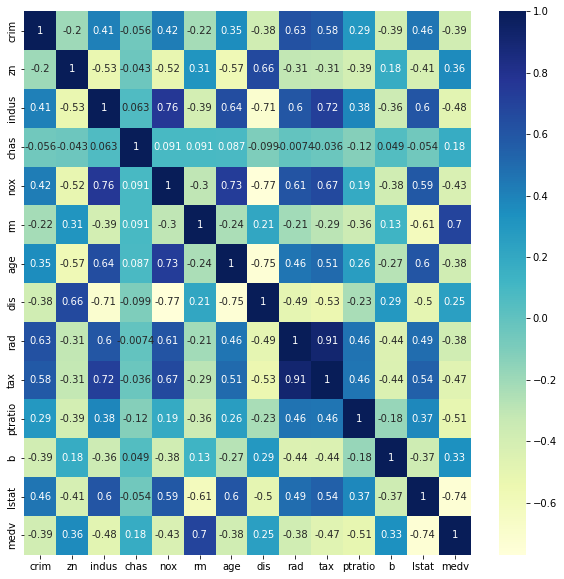

In [ ]:
plt.figure(figsize=(10,10))
correlation= df.corr()
sns.heatmap(correlation, cmap="YlGnBu", annot=True)

Splitting the dataset

In [ ]:
X = df.drop(['medv'], axis=1)
y = df['medv']

In [ ]:
print(X)
print(y)

        crim    zn  indus  chas    nox  ...  rad  tax  ptratio       b  lstat
0    0.00632  18.0   2.31     0  0.538  ...    1  296     15.3  396.90   4.98
1    0.02731   0.0   7.07     0  0.469  ...    2  242     17.8  396.90   9.14
2    0.02729   0.0   7.07     0  0.469  ...    2  242     17.8  392.83   4.03
3    0.03237   0.0   2.18     0  0.458  ...    3  222     18.7  394.63   2.94
4    0.06905   0.0   2.18     0  0.458  ...    3  222     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...  ...      ...     ...    ...
501  0.06263   0.0  11.93     0  0.573  ...    1  273     21.0  391.99   9.67
502  0.04527   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   9.08
503  0.06076   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   5.64
504  0.10959   0.0  11.93     0  0.573  ...    1  273     21.0  393.45   6.48
505  0.04741   0.0  11.93     0  0.573  ...    1  273     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1      21.6
2      34.7
3  

In [ ]:
#splitting into train test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,
                                                    random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training
XGBoost Regressor
(a type of decision tree model)

In [ ]:
#Loading the model
model = XGBRegressor()

In [ ]:
# Training the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

In [ ]:
#accuracy for training data
training_data_prediction = model.predict(X_train)

# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

#Mean absolute error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print(score_1)
print(score_2)

0.9999948236320982
0.0145848437110976


In [ ]:
#accuracy for test data (most important)
test_data_prediction = model.predict(X_test)

# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

#Mean absolute error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print(score_1)
print(score_2)                              

0.8711660369151691
2.2834744154238233
